In [1]:
import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from PIL import Image
from scipy import misc
import os
# import imageio
import matplotlib.pyplot as plt
%matplotlib inline

(218, 178, 3)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


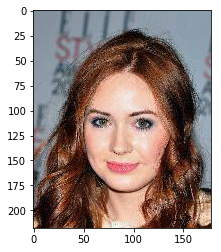

In [5]:
img=misc.imread("./img_align_celeba/000085.jpg")
print img.shape
# print img.reshape(38804, 3)
plt.imshow(img)

In [47]:
def get_image(img_path):
#     img = misc.imread(img_path)/255. - 0.5
    img = misc.imread(img_path)
#     img = img[..., ::-1]  # rgb to bgr
    return img

# def batch(batch_size):
#     return (np.random.sample(batch_size)*160000).astype(int)

class layer:
    def __init__(self, in_size, out_size):
        self.W = tf.Variable(tf.random_normal([in_size, out_size], mean=0.0, stddev=0.1))
        self.b = tf.Variable(tf.random_normal([1, out_size], mean=0.0, stddev=0.1))
    def output(self, inputs, activation_function=None):
        if activation_function == None:
            return tf.matmul(inputs, self.W) + self.b
        else :
            return activation_function(tf.matmul(inputs, self.W) + self.b)

def weight_variable(shape):
    initial = tf.random_normal(shape, mean=0.0, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.random_normal(shape, mean=0.0, stddev=0.1)
    return tf.Variable(initial)

(218, 178, 3)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


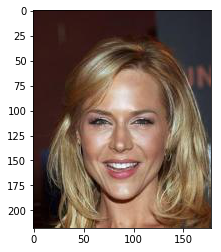

In [48]:
img = get_image("./img_align_celeba/160004.jpg")
print img.shape
plt.imshow(img)

In [49]:
batch_size = 100
g_dim = 128

In [50]:
x_d = tf.placeholder(tf.float32, shape=[None, 218*178*3])
x_g = tf.placeholder(tf.float32, shape=[None, g_dim])

In [57]:
d_l1 = layer(218*178*3, 256)
d_l2 = layer(256, 100)
d_l3 = layer(100, 1)

g_l1 = layer(g_dim, 512)
g_l2 = layer(512, 218*178*3)

var_d = [d_l1.W, d_l1.b, d_l2.W, d_l2.b, d_l3.W, d_l3.b]
var_g = [g_l1.W, g_l1.b, g_l2.W, g_l2.b]

In [58]:
def discriminator(x):
    x_reshape = tf.reshape(x, [-1, 218*178*3])
    h_d1 = d_l1.output(x_reshape, tf.nn.relu)
    h_d2 = d_l2.output(h_d1, tf.nn.relu)
    h_d3 = d_l3.output(h_d2, tf.nn.sigmoid)
    return h_d3

def generator(x):
    h_g1 = g_l1.output(x, tf.nn.relu)
    h_g2 = g_l2.output(h_g1, tf.nn.sigmoid)
    return h_g2

def sample_Z(m,n):
    return np.random.uniform(-1., 1., size=[m,n])

g_sample = generator(x_g)
d_real = discriminator(x_d)
d_fake = discriminator(g_sample)

d_loss = -tf.reduce_mean(tf.log(d_real)+tf.log(1-d_fake))    # d_real, 1-d_fake bigger -> better
g_loss = -tf.reduce_mean(tf.log(d_fake))    # d_fake bigger -> better

In [59]:
d_optimizer = tf.train.AdamOptimizer(0.000001).minimize(d_loss, var_list = var_d)
# d_optimizer = tf.train.MomentumOptimizer(0.01,0.01).minimize(d_loss, var_list = var_d)

g_optimizer = tf.train.AdamOptimizer(0.000001).minimize(g_loss, var_list = var_g)
# g_optimizer = tf.train.MomentumOptimizer(0.01,0.01).minimize(g_loss, var_list = var_g)

# index = np.arange(202599)
ls = np.array(os.listdir("./img_align_celeba"))


In [ ]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print "start!"

for step in range(1001):
    index = (np.random.sample(batch_size)*202599).astype(int)
#     ls_x = ls[[index[batch_size*batch:batch_size*(batch+1)]]]
    ls_x = ls[[index]]
#     batch_x = [tf.reshape(misc.imread("./img_align_celeba/"+x), [-1,116412]) for x in ls_x]
    batch_x = [np.reshape(misc.imread("./img_align_celeba/"+x), 116412)/255. for x in ls_x]
#     print batch_x
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%10==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train

zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(218,178,3)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j])

In [43]:
for step in range(10001):
    index = (np.random.sample(batch_size)*202599).astype(int)
#     ls_x = ls[[index[batch_size*batch:batch_size*(batch+1)]]]
    ls_x = ls[[index]]
#     batch_x = [tf.reshape(misc.imread("./img_align_celeba/"+x), [-1,116412]) for x in ls_x]
    batch_x = [np.reshape(misc.imread("./img_align_celeba/"+x), 116412)/255 for x in ls_x]
#     print batch_x
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%100==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


step: 0  d-loss: 0.291052  g-loss: 5.38144
step: 100  d-loss: 0.211351  g-loss: 6.00333
step: 200  d-loss: 0.227985  g-loss: 6.26915
step: 300  d-loss: 0.236268  g-loss: 7.87852
step: 400  d-loss: 0.180365  g-loss: 8.64744
step: 500  d-loss: 0.221336  g-loss: 7.16734
step: 600  d-loss: 0.200175  g-loss: 6.77076
step: 700  d-loss: 0.195501  g-loss: 7.2209
step: 800  d-loss: 0.17065  g-loss: 9.32011
step: 900  d-loss: 0.160879  g-loss: 10.284
step: 1000  d-loss: 0.171861  g-loss: 11.2891
step: 1100  d-loss: 0.172464  g-loss: 11.7617
step: 1200  d-loss: 0.154698  g-loss: 12.4671
step: 1300  d-loss: 0.148641  g-loss: 9.01579
step: 1400  d-loss: 0.285563  g-loss: 12.3034
step: 1500  d-loss: 0.140875  g-loss: 10.6966
step: 1600  d-loss: 0.15181  g-loss: 10.2775
step: 1700  d-loss: 0.151032  g-loss: 12.2335
step: 1800  d-loss: 0.120213  g-loss: 9.53294
step: 1900  d-loss: 0.145999  g-loss: 11.4698
step: 2000  d-loss: 0.149312  g-loss: 14.3147
step: 2100  d-loss: 0.0974155  g-loss: 18.7729
ste

ValueError: cannot reshape array of size 1 into shape (116412,)

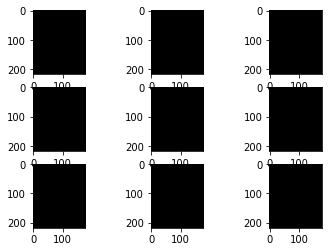

In [44]:
zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(218,178,3)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j])

In [114]:
(np.random.sample(10)*160000).astype(int)

array([101802, 157808,   9400,  92477, 157041,  75284,  41651,  85575,
        20414,  41667])

In [115]:
batch(50)

array([118976,   8817,  52741, 111914,  47822,  27392, 144757,  10889,
        54161,   6689, 121224, 105846,  88511, 154653,  97761, 106392,
         2865,  66142,  86584,  48470, 118227, 144308,   6384,  72424,
        98078,  44851,  86356,  97374,  30572,  48292,  87322, 116314,
        59938,  26624,  71212, 153320,  68011,  10415, 108333,  68159,
        63389, 135509,  87137, 131045,  89396,   9144, 112805,  81197,
       125009, 105519])

In [116]:
ls = np.array(os.listdir("./img_align_celeba"))
len(ls)
ls.shape

(202599,)

In [117]:
# index = (np.random.sample(batch_size)*202599).astype(int)
index = np.arange(202599)
np.random.shuffle(index)
# ls = os.listdir("./img_align_celeba")
print index

[ 89933 186516  88747 ..., 157515  70575  78568]


In [118]:

batch_size=100
batch = 1
ls_x = ls[[index[batch_size*batch:batch_size*(batch+1)]]]
print ls_x
batch_x = [misc.imread("./img_align_celeba/"+x) for x in ls_x]
print batch_x

['160852.jpg' '126041.jpg' '084619.jpg' '060781.jpg' '141302.jpg'
 '112783.jpg' '115131.jpg' '131234.jpg' '027846.jpg' '176872.jpg'
 '074700.jpg' '129744.jpg' '001465.jpg' '020143.jpg' '161703.jpg'
 '201490.jpg' '126076.jpg' '138069.jpg' '038756.jpg' '006534.jpg'
 '197583.jpg' '168477.jpg' '002808.jpg' '068193.jpg' '092868.jpg'
 '149544.jpg' '031727.jpg' '041583.jpg' '011370.jpg' '051431.jpg'
 '190861.jpg' '061312.jpg' '197566.jpg' '033303.jpg' '076105.jpg'
 '126829.jpg' '187199.jpg' '014422.jpg' '153473.jpg' '115699.jpg'
 '071448.jpg' '027030.jpg' '118036.jpg' '045851.jpg' '098319.jpg'
 '093679.jpg' '008494.jpg' '118948.jpg' '180003.jpg' '154529.jpg'
 '142781.jpg' '185758.jpg' '198824.jpg' '119319.jpg' '085338.jpg'
 '110893.jpg' '031490.jpg' '012704.jpg' '055739.jpg' '065261.jpg'
 '062004.jpg' '117160.jpg' '129325.jpg' '061479.jpg' '127195.jpg'
 '036999.jpg' '074302.jpg' '140881.jpg' '012235.jpg' '159938.jpg'
 '046903.jpg' '057211.jpg' '060999.jpg' '065893.jpg' '141491.jpg'
 '184749.j

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


[array([[[ 54,  42,  26],
        [ 48,  36,  20],
        [ 60,  49,  31],
        ..., 
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 54,  42,  26],
        [ 48,  36,  20],
        [ 60,  49,  31],
        ..., 
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 53,  41,  25],
        [ 48,  36,  20],
        [ 61,  50,  32],
        ..., 
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255]],

       ..., 
       [[ 52,  53,  57],
        [ 55,  56,  60],
        [ 57,  58,  62],
        ..., 
        [100, 103, 108],
        [102, 105, 110],
        [ 98, 101, 106]],

       [[ 57,  58,  62],
        [ 53,  54,  58],
        [ 52,  53,  57],
        ..., 
        [ 96,  99, 104],
        [ 97, 100, 105],
        [ 97, 100, 105]],

       [[ 57,  58,  62],
        [ 53,  54,  58],
        [ 52,  53,  57],
        ..., 
        [ 96,  99, 104],
        [ 97, 100, 105],
        [ 97, 100

In [119]:
a=np.array([1,2,3,4,5,6,7])
b=[2,3,4]
print a[[1, 3]]

[2 4]
